# IF240 - Apprentissage et deep learning

## Practice 1: Kmeans algorithm

By Aurélie Bugeau
Credits:  Chris Piech and Andrew Ng

K-Means is an algorithm that takes aims at clustering a given dataset into $k$ groups (called clusters) of data similar to each other. Each cluster is characterized by its centroid. 
In this practice, you are going to implement the kmeans algorithm and apply it on different dataset.

1. Read and understand the kmeans function below
2. Complete the followinf functions
3. Experiment and validate on a toy dataset

In [29]:
import numpy as np

# Function: K Means
# -------------
def kmeans(dataSet, k, MAX_ITERATIONS=5):
    
    centroids = getRandomCentroids(dataSet, k)
    iterations = 0
    oldCentroids = None
    
    while not shouldStop(oldCentroids, centroids, iterations, MAX_ITERATIONS):
        oldCentroids = centroids
        iterations += 1
        labels = getLabels(dataSet, centroids)
        centroids = getCentroids(dataSet, labels, k)
    
    return centroids, labels


In [30]:
# Function: getRandomCentroids
# -------------
# Initialize centroids by choosing randomly k points from the dataset
def getRandomCentroids(dataSet, numClusters):
    numPoints, _ = dataSet.shape
    centroids = dataSet[np.random.randint(numPoints, size =  numClusters), :]
    return centroids

In [31]:
# Function: shouldStop
# -------------
# Returns True or False if k-means if the maximum number of iterations is reached 
# or if the centroids do not change anymore
def shouldStop(oldCentroids, centroids, iterations, MAX_ITERATIONS):
    if(iterations < MAX_ITERATIONS):
        return np.array_equal(oldCentroids,centroids)
    return True

In [32]:
# Function: getLabels
# -------------
# Returns the label for each point in the dataSet. The label is the one of the closest centroid
def getLabels(dataSet, centroids):
    labels = np.zeros(len(dataSet), dtype=int)
    for i in range(len(dataSet)):
        min=0;
        dist_min=np.linalg.norm(dataSet[i]-centroids[min])
        for k in range(len(centroids)):
            dist = np.linalg.norm(dataSet[i]-centroids[k])
            if(dist<dist_min):
                dist_min = dist
                min = k
        labels[i] = min
    return labels
    
    

In [33]:
# Function: getCentroids
# -------------
# Returns the centroids of the clusters. Each centroid is the geometric mean of the points that
# have that centroid's label. Important: If a centroid is empty (no points have
# that centroid's label) you should randomly re-initialize it.
def getCentroids(dataSet, labels, k):
    centroids = [[] for i in range(k)]
    centroids_f = np.zeros((k,len(dataSet[0])))
    for i in range(len(dataSet)): #Ajoute les positions de tous les points appartenant aux centoids
        centroids[labels[i]].append(dataSet[i])
    for c in range(k):
        if(len(centroids[c])==0):
            centroids_f[c]= getRandomCentroids(dataSet, 1)
        else:
            new_centro = [0]*len(centroids[c][0]) # changer avec des np.zeros
            for s in range(len(centroids[c][0])):
                for v in range(len(centroids[c])):
                    new_centro[s]+=centroids[c][v][s]
                centroids_f[c][s]=new_centro[s]/len(centroids[c])
    return centroids_f


### Toy dataset

Experiment your algorithm on different sets of points with different values of $k$

In [35]:
x1 = np.array([1, 1])
x2 = np.array([2, 2])
x3 = np.array([3, 3])
x4 = np.array([4, 4])
testX = np.vstack((x1, x2, x3, x4))
result = kmeans(testX, 1)

### 2D Point Cloud
You are now goind to test and plot the result on a 2D point cloud

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

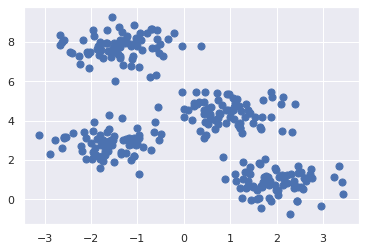

In [37]:
# dataset generation
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

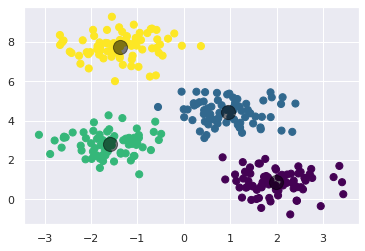

In [38]:
# Apply kmeans
centers,labels = kmeans(X, 4)

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

#plot the centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### Scikit-learn library
The Scikit-learn library proposes many functions for machine learning. You are going to compare the results obtained by your implementation with the ones from this library. 

* Study the documentation of the KMeans function and apply it to the 2D dataset.
* Compare

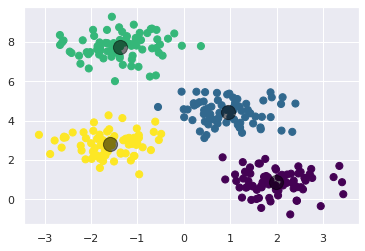

In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=0).fit(X)

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, s=50, cmap='viridis')

#plot the centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)

### 2 moons problem
Observe and explain the clustering in 2 classes obtained on the following dataset

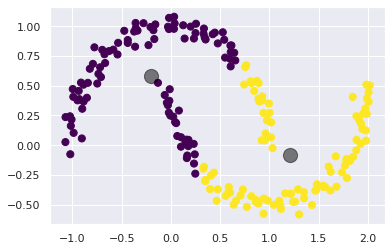

In [47]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

km2 = KMeans(n_clusters=2, random_state=0).fit(X)

#plot the labels
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_, s=50, cmap='viridis')

#plot the centers
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)

### 3D Point Cloud
Observe and explain the clustering on a 3D point cloud

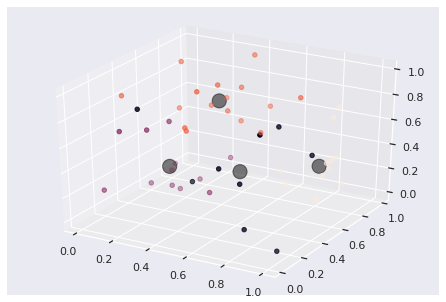

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.random.rand(50,3)
centers,labels = kmeans(X, 4)
ax.scatter(X[:, 0], X[:, 1],X[:, 2],c=labels, s=20)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.show()